# Sports Analytics - This notebook focused on improving on the idea of identifying high risk movements

In [1]:
import sys

sys.path.append('../')
import polars as pl

from src.sports_analytics import SportsAnalytics, TeamAnalytics, PositionAnalytics, PlayerAnalytics

df = pl.read_csv("../data/raw/anonymous.csv").with_columns(
    pl.col("date").str.strptime(pl.Date, "%d/%m/%Y")
)

high_risk_thresholds = {
    "total_player_load": 800,
    "high_intensity_distance_m_v5_v6_m": 500,  # in meters
    "total_acc_dec_efforts": 3.0  # in m/s^2
}

In [4]:
# Trying to plot and visualize high risk movements per player.
# Making it easy to read with green-yellow-red background to identify the risk.

data = SportsAnalytics(df).identify_high_risk_instances(high_risk_thresholds)

team_analytics = TeamAnalytics(data)
position_analytics = PositionAnalytics(data)
player_analytics = PlayerAnalytics(data)
# Define date range
start_date = '2023-01-01'
end_date = '2023-12-31'

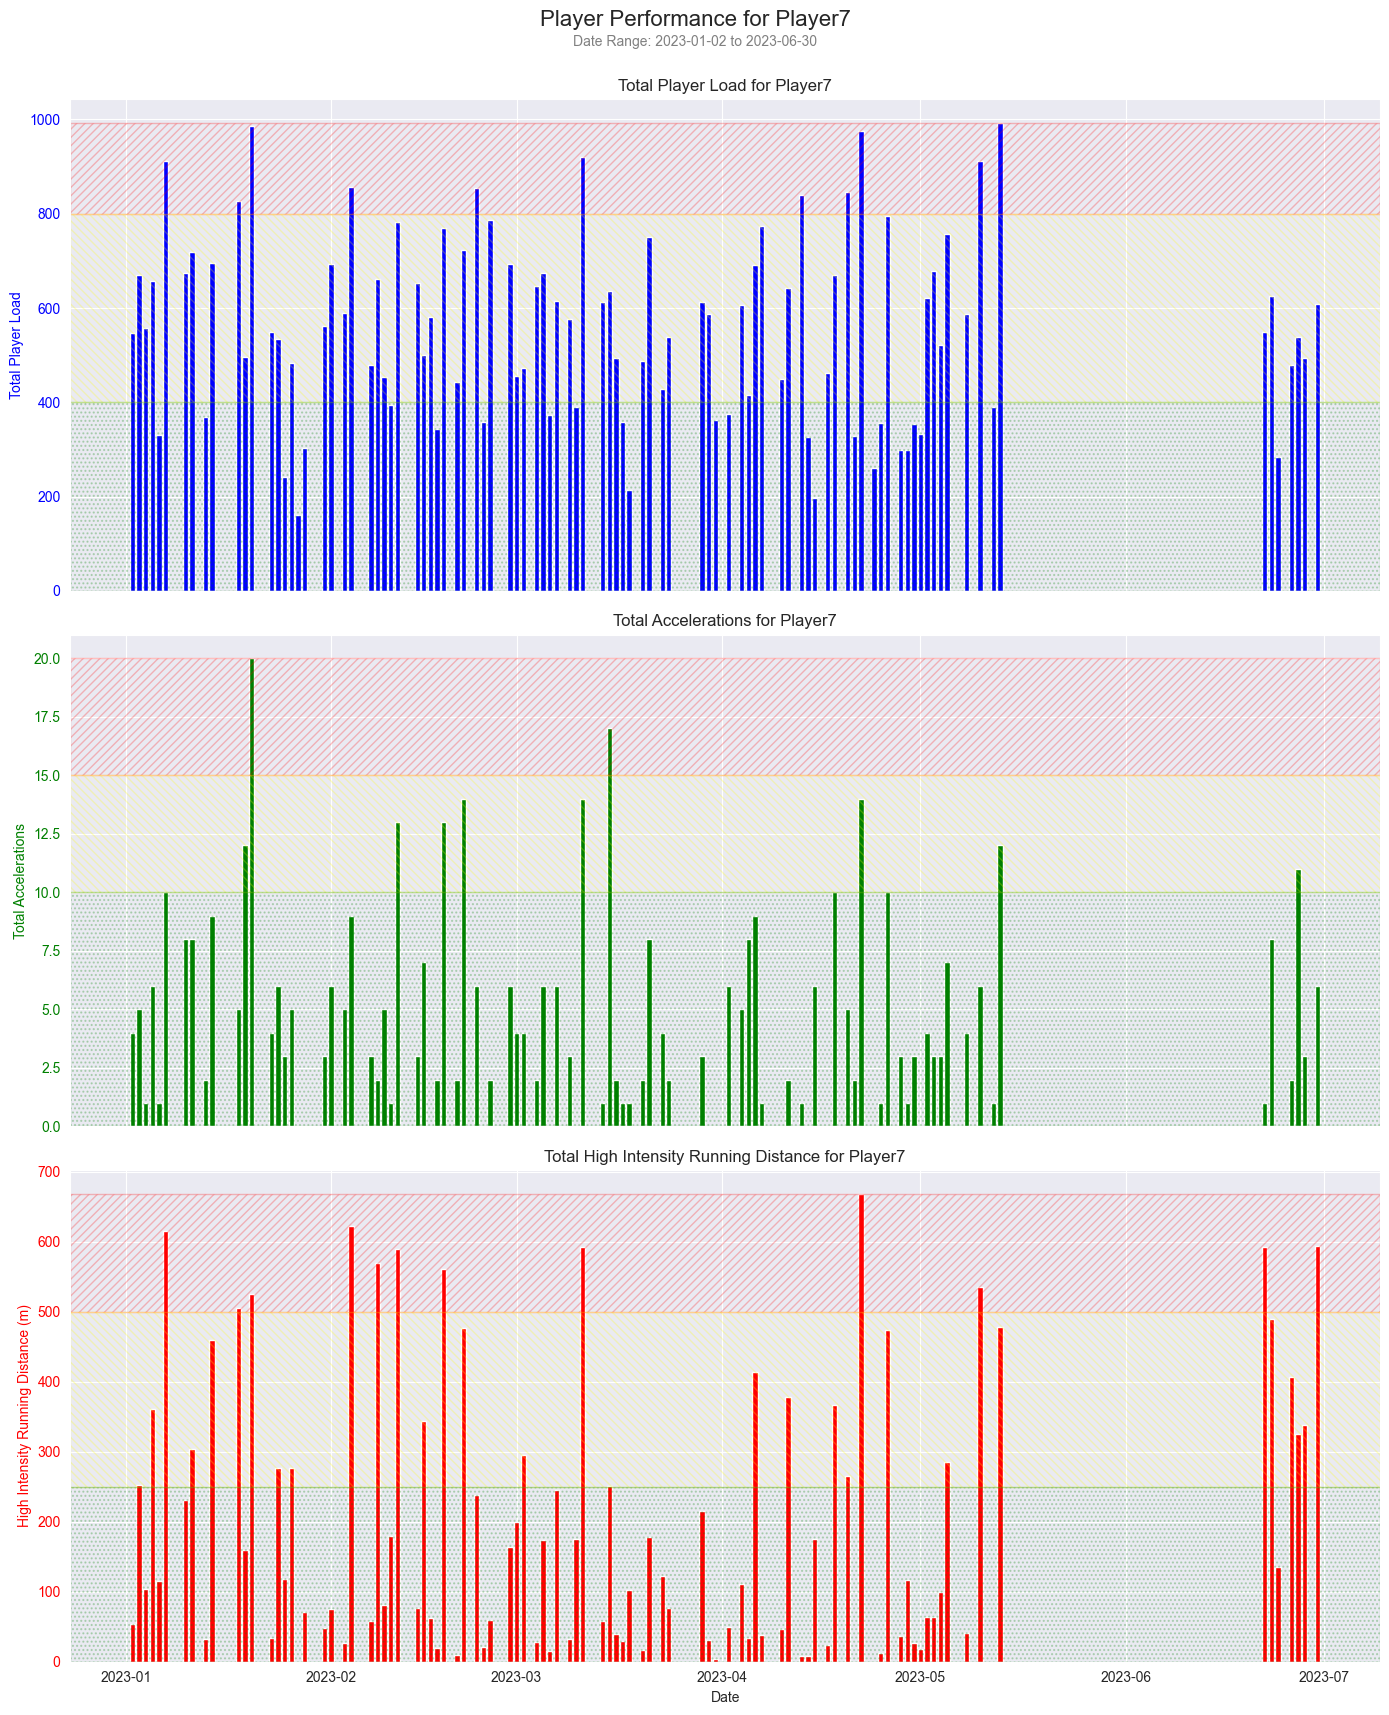

In [5]:
player_analytics.plot_player('Player7', start_date, end_date)

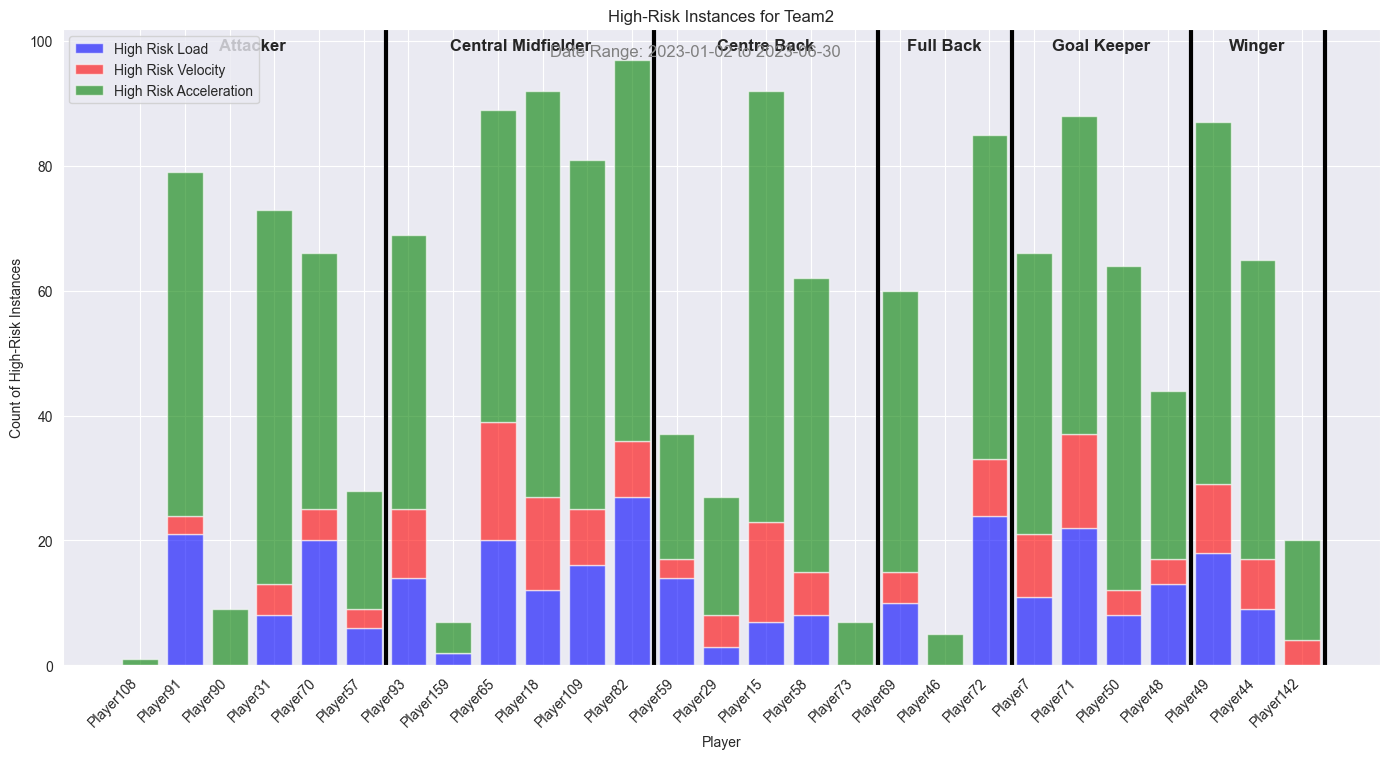

In [6]:
team_analytics.plot_team('Team2', start_date, end_date)

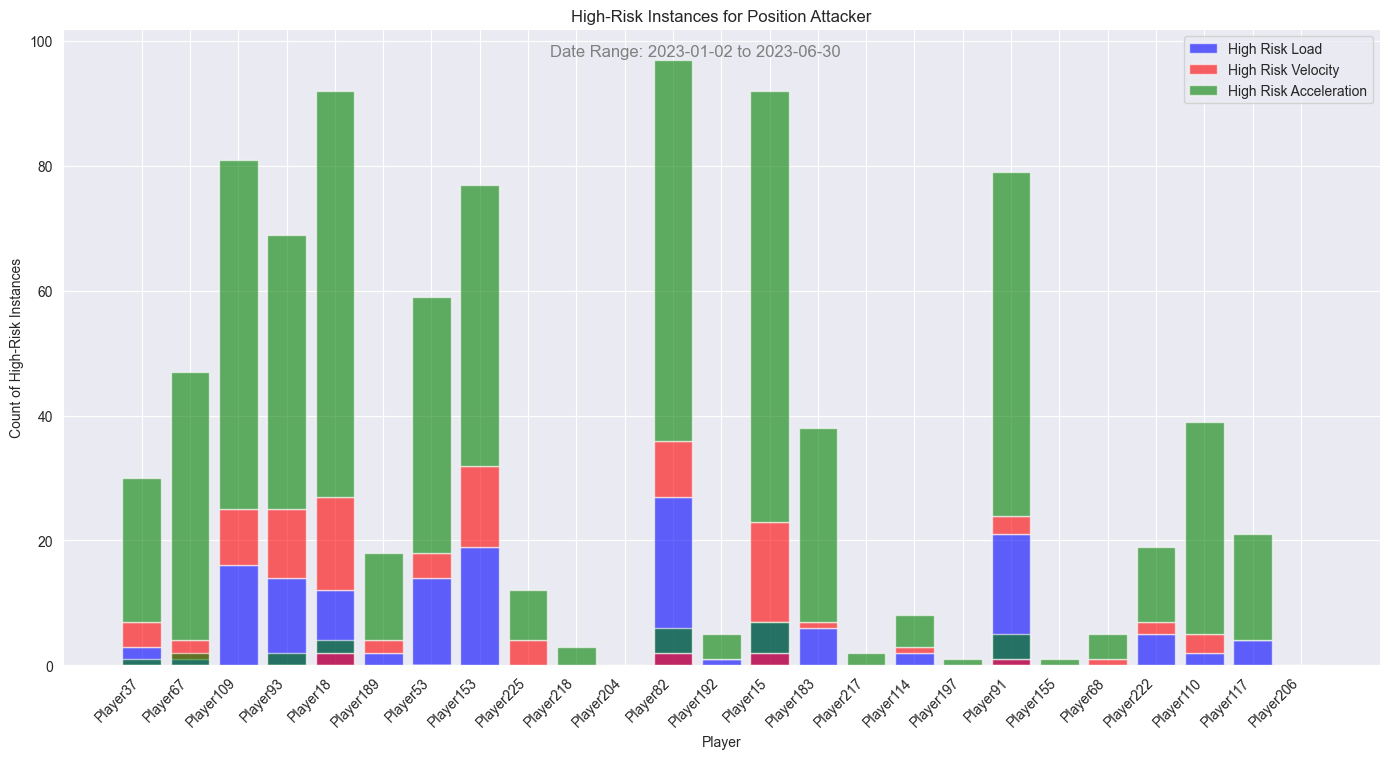

In [7]:
position_analytics.plot_position('Attacker', start_date, end_date)